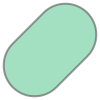

In [1]:
from shapely.geometry import Point, LineString
LineString([(0, 0), (1, 1)]).buffer(1)

In [8]:
from geopandas import GeoDataFrame
from shapely.geometry import box
d=GeoDataFrame([{"h": "1", "geometry": box(1,1,2,2)},{"h": "2", "geometry": box(0,100,200,300)}])
d

,h,geometry
0,1,"POLYGON ((2.000 1.000, 2.000 2.000, 1.000 2.00..."
1,2,"POLYGON ((200.000 100.000, 200.000 300.000, 0...."


In [10]:
d.sindex.query(LineString([(0, 0), (1, 1),(100,100)]).buffer(1))

array([0, 1])

In [11]:
from pyproj import Transformer
transformer = Transformer.from_crs(4326, 3857,always_xy=True)
lng,lat=116.51172,39.92123
transformer.transform(lng,lat)


(12970025.341848467, 4854502.231468809)

In [23]:
import json
from shapely import wkt
import sys
h = LineString([(0, 0), (1, 1)]).buffer(1).wkb_hex
b=LineString([(0, 0), (1, 1)]).buffer(1).wkb
s = LineString([(0, 0), (1, 1)]).buffer(1).wkt
print(sys.getsizeof(h))
print(sys.getsizeof(b))
print(sys.getsizeof(s))

2219
1118
2599


In [36]:
from shapely import wkb
wkb.loads(b)
# wkt.loads(s)
from split import chop

for idx,v in enumerate(chop(2,{1,23,4,5,6,45,888,24,265,234,453,5,298})):
    print(idx,v)
print(Exception("a"))
LineString([(0, 0), (1, 1)]).buffer(1).wkt
print(*{1,2,3,4})

0 [1, 4]
1 [453, 5]
2 [6, 265]
3 [234, 298]
4 [45, 23]
5 [888, 24]
a
1 2 3 4


In [2]:
import pandas as pd
from geopandas import GeoDataFrame, read_file

import sys
sys.path.append("..")
import movingpandas as mpd
mpd.show_versions()

import warnings
warnings.simplefilter("ignore")


MovingPandas 0.9.rc3

SYSTEM INFO
-----------
python     : 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:53:57) [GCC 9.4.0]
executable : /home/liontao/miniconda3/envs/beam/bin/python
machine    : Linux-5.10.102.1-microsoft-standard-WSL2-x86_64-with-glibc2.31

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.10.2
GEOS lib   : /home/liontao/miniconda3/envs/beam/lib/libgeos_c.so
GDAL       : 3.4.1
GDAL data dir: /home/liontao/miniconda3/envs/beam/share/gdal
PROJ       : 8.2.1
PROJ data dir: /home/liontao/miniconda3/envs/beam/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.10.2
pandas     : 1.4.1
fiona      : 1.8.21
numpy      : 1.22.3
shapely    : 1.8.0
rtree      : 0.9.7
pyproj     : 3.3.0
matplotlib : 3.5.1
mapclassify: 2.4.3
geopy      : 2.2.0
holoviews  : 1.14.8
hvplot     : 0.7.3
geoviews   : 1.9.5
stonesoup  : 0.1b8


In [49]:
raw_df = pd.read_csv('data/all.txt', delimiter=',')
raw_df.columns = ['trajectory_id','t','X','Y']
traj_collection = mpd.TrajectoryCollection(raw_df, 'trajectory_id', t='t', x='X', y='Y')
splitted = mpd.TemporalSplitter(traj_collection).split(mode="day",min_length=50)

In [50]:
res=[t for t in filter(lambda x:x.size()<200 and x.size()>50 and x.get_length()<200000, splitted)]
len(res)

195

In [74]:
df = res[0].to_point_gdf()
df

,trajectory_id,geometry,X,Y
t,,,,
2008-02-03 00:00:32,1,POINT (116.69171 39.85184),116.69171,39.85184
2008-02-03 00:10:32,1,POINT (116.69170 39.85184),116.69170,39.85184
2008-02-03 00:20:32,1,POINT (116.69170 39.85184),116.69170,39.85184
2008-02-03 00:30:32,1,POINT (116.69168 39.85146),116.69168,39.85146
2008-02-03 00:40:32,1,POINT (116.69172 39.85165),116.69172,39.85165
...,...,...,...,...
2008-02-03 23:15:12,1,POINT (116.69160 39.85181),116.69160,39.85181
2008-02-03 23:25:12,1,POINT (116.69163 39.85195),116.69163,39.85195
2008-02-03 23:35:13,1,POINT (116.69159 39.85173),116.69159,39.85173


In [ ]:
df=df.reset_index()
df['X']=df["geometry"].x
df['Y']=df["geometry"].y
df.columns
df.to_csv(columns=["trajectory_id","t","X","Y"],header=False,index=False)

In [78]:
from tqdm.autonotebook import tqdm
for i,t in enumerate(tqdm(res)):
    df = t.to_point_gdf().reset_index()
    df['X']=df["geometry"].x
    df['Y']=df["geometry"].y
    df["trajectory_id"]=i+1
    with open(f"data/filtered/{i+1}.txt",'w') as f:
        df.to_csv(f,columns=["trajectory_id","t","X","Y"],header=False,index=False)

100%|██████████| 195/195 [00:00<00:00, 451.33it/s]


In [1]:
c=0
for i in range(1,151):
    with open(f"data/filtered/{i}.txt") as f:
        c+=len(f.readlines())
c

17712

In [1]:
import json
import pandas as pd
bucket = []
for i in range(200,1001,100):
    with open(f"/mnt/g/Tencent/results_backup/{i}_0.2_2000.json") as f:
        bucket.append(json.load(f))
df=pd.DataFrame(bucket)
df = df.rename(columns={"t1":"insertion time","t2":"query time"})
df.to_excel("/mnt/g/Tencent/results_backup/m-varient.xlsx",columns=["insertion time","query time","tps","latency"])

In [8]:
%%bash
for i in {1..10}
do
((p=3000+$i))
echo $p
done

3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
